In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [9]:
def display_img(img):
    new_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()
#     cv2.imshow('image', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# Section 1

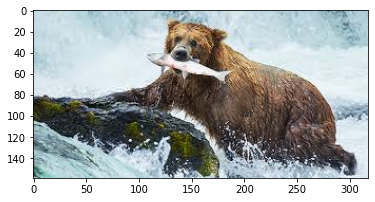

In [8]:
bear1= cv2.imread('bear1.jpeg')
if bear1 is not None: 
    display_img(bear1)

In [4]:
bear1.shape

(159, 318, 3)

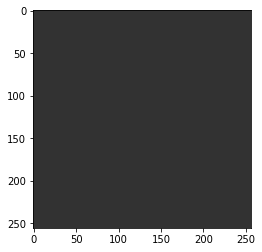

In [22]:
##Display an image colored with any value
img= np.zeros((256,256,3),dtype=np.uint8)
img[:,:,[0,2]]=50
img[:,:,1]=50

display_img(img)

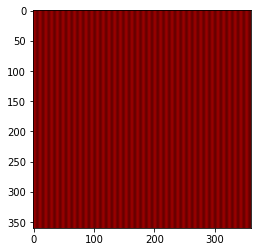

In [25]:
red_image= np.zeros((360,360,3), dtype=np.uint8)
indices= np.arange(0,360,2)
red_image[:,indices,2]=255
display_img(red_image)

# Section 2

In [29]:
def extract_color(min_value:np.ndarray, max_value:np.ndarray, img, display=True):
    hsv_img= cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask= cv2.inRange(hsv_img,min_value,max_value) ## 2D matrix
    if display:
        display_img(mask)
    extracted_img= cv2.bitwise_and(img,img,mask=mask)
    return extracted_img

In [26]:
low_green = np.array([25, 52, 72]).reshape((1,1,3))
high_green = np.array([102, 255, 255]).reshape((1,1,3))

low_dark_red = np.array([150, 10, 0]).reshape((1,1,3))
high_dark_red = np.array([255, 255, 255]).reshape((1,1,3))


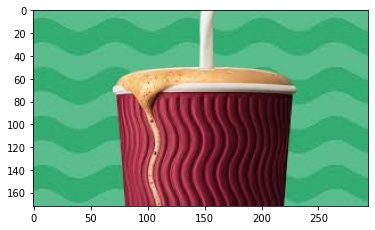

In [27]:
cup=cv2.imread('cup.jpeg')
display_img(cup)

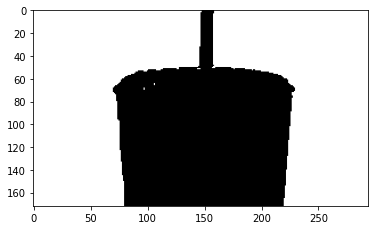

In [30]:
green_img=extract_color(low_green,high_green,cup)

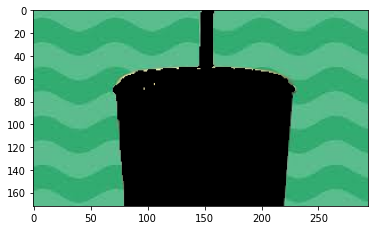

In [31]:
display_img(green_img)

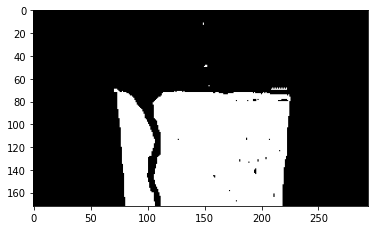

In [32]:
dark_red_img=extract_color(low_dark_red,high_dark_red,cup)

In [34]:
cap= cv2.VideoCapture(0)
while True:
    ret,img= cap.read()
#     img= cv2.resize(img, (360,360))
    cv2.imshow('Original',img)
    cv2.imshow('Green Extracted',extract_color(low_green,high_green,img, False))
    if cv2.waitKey(1) == 27:
        break
cv2.destroyAllWindows()
cap.release()    

# Section 3

[[ 45.787537  33.385315 111.48047 ]
 [130.61972  181.28026   88.462944]]


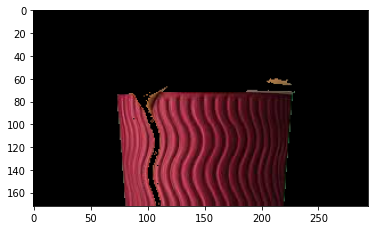

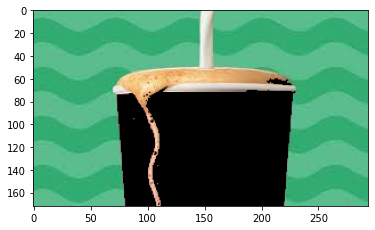

In [42]:
import cv2 as cv
def getKmeans(clusters, image:np.ndarray):
    datapoints= image.reshape((-1,3)).astype(np.float32) # It is a colored image, so each pixel has 3 features
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv.kmeans(datapoints,clusters,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
#     print(ret)
#     print(label)
    print(center)
    labels= label.reshape((image.shape[0],image.shape[1]))
    for i in range(clusters):#0,1,...clusters-1
        new_image= image.copy()
        new_image[labels!=i]= np.uint8([0,0,0])
        display_img(new_image)
getKmeans(2,cup)

# Section 4

In [44]:
x= np.array([1,10,5,6,10,10,1,2,4,5,6,7,10,1])

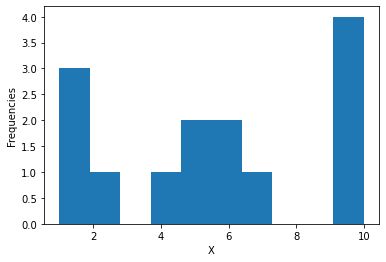

In [45]:
plt.hist(x)
plt.ylabel('Frequencies')
plt.xlabel('X')
plt.show()

In [46]:
hist = cv.calcHist([cup],[1],None,[256],[0,256])

In [47]:
hist[:10]

array([[264.],
       [121.],
       [137.],
       [174.],
       [208.],
       [226.],
       [228.],
       [282.],
       [253.],
       [313.]], dtype=float32)

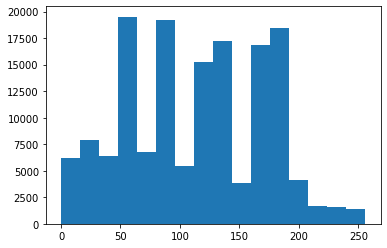

In [48]:
plt.hist(cup.ravel(),16,[0,256]);
plt.show()